<a href="https://colab.research.google.com/github/maralmonpe6805/telecomx2_mario/blob/main/telecomx2_mario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXTRACCION DE LOS DATOS TRATADOS:**

In [40]:
import pandas as pd
datos = pd.read_csv("/content/telecomx2_datos_procesados.csv")
datos.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias,Cantidad_Servicios,MonthlyGroup
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.186667,4,Medio
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,3,Medio
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,2,Alto
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,5,Alto
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,3,Alto


In [41]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   Churn               7043 non-null   int64  
 2   gender              7043 non-null   object 
 3   SeniorCitizen       7043 non-null   int64  
 4   Partner             7043 non-null   int64  
 5   Dependents          7043 non-null   int64  
 6   tenure              7043 non-null   int64  
 7   PhoneService        7043 non-null   int64  
 8   MultipleLines       7043 non-null   int64  
 9   InternetService     7043 non-null   object 
 10  OnlineSecurity      7043 non-null   int64  
 11  OnlineBackup        7043 non-null   int64  
 12  DeviceProtection    7043 non-null   int64  
 13  TechSupport         7043 non-null   int64  
 14  StreamingTV         7043 non-null   int64  
 15  StreamingMovies     7043 non-null   int64  
 16  Contra

**ELIMINACION DE COLUMNAS NO RELEVANTES:**

In [42]:
datos_1 = datos.drop("customerID", axis=1)

In [43]:
for col in datos_1.columns:
    print(f"Columna: {col}")
    print(datos_1[col].unique())

Columna: Churn
[0 1]
Columna: gender
['Female' 'Male']
Columna: SeniorCitizen
[0 1]
Columna: Partner
[1 0]
Columna: Dependents
[1 0]
Columna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Columna: PhoneService
[1 0]
Columna: MultipleLines
[0 1]
Columna: InternetService
['DSL' 'Fiber optic' 'No']
Columna: OnlineSecurity
[0 1]
Columna: OnlineBackup
[1 0]
Columna: DeviceProtection
[0 1]
Columna: TechSupport
[1 0]
Columna: StreamingTV
[1 0]
Columna: StreamingMovies
[0 1]
Columna: Contract
['One year' 'Month-to-month' 'Two year']
Columna: PaperlessBilling
[1 0]
Columna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Columna: Monthly
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
Columna: Total
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Columna: C

**ELEMENTOS A CODIFICAR PARA MEJOR FUNCIONAMIENTO DEL MODELO:**

In [44]:
datos_1['gender'] = datos_1['gender'].map({'Female': 0, 'Male': 1})

In [45]:
columnas_categorticas = ['InternetService', 'Contract', 'PaymentMethod', 'MonthlyGroup']
datos_encoded = pd.get_dummies(datos_1, columns=columnas_categorticas, drop_first=True, dtype=int)
datos_encoded.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyGroup_Bajo,MonthlyGroup_Medio,MonthlyGroup_Muy Alto
0,0,0,0,1,1,9,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,9,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,1,0,0,0,4,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,1,1,1,0,13,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,1,0,1,1,0,3,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


**VERIFICACION DE LA PROPORCION DE CANCELACION (CHURM):**

In [46]:
datos_encoded['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,73.463013
1,26.536987


Se aprecia que los clientes que no cancelaron representan el 73.46% del total, lo cual genera un desbalance en el modelo. Lo que más se quiere predecir es que clientes van a abandonar, por lo que se produce un desbalance. El modelo será muy bueno en predecir que cliente no abandona, pero perderá el foco de encontrar que cliente puede llegar a abandonar.

In [47]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [48]:
X = datos_encoded.drop('Churn', axis=1)
y = datos_encoded['Churn']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

Se aplica SMOTE en el set de entrenamiento y se deja sin cambios el set de pruebas

In [50]:
print(f"Antes de realizar SMOTE, tenemos {y_train.value_counts(normalize=True) * 100}")

Antes de realizar SMOTE, tenemos Churn
0    73.464679
1    26.535321
Name: proportion, dtype: float64


In [51]:
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Después de realizar SMOTE, tenemos {y_train_resampled.value_counts(normalize=True) * 100}")

Después de realizar SMOTE, tenemos Churn
1    50.0
0    50.0
Name: proportion, dtype: float64


**NORMALIZACION DE LOS DATOS:**

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
cols_to_scale = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias', 'Cantidad_Servicios']
scaler = StandardScaler()

# Entrenamiento
X_train_resampled[cols_to_scale] = scaler.fit_transform(X_train_resampled[cols_to_scale])

# Prueba
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

**ANALISIS DE CORRELACION:**

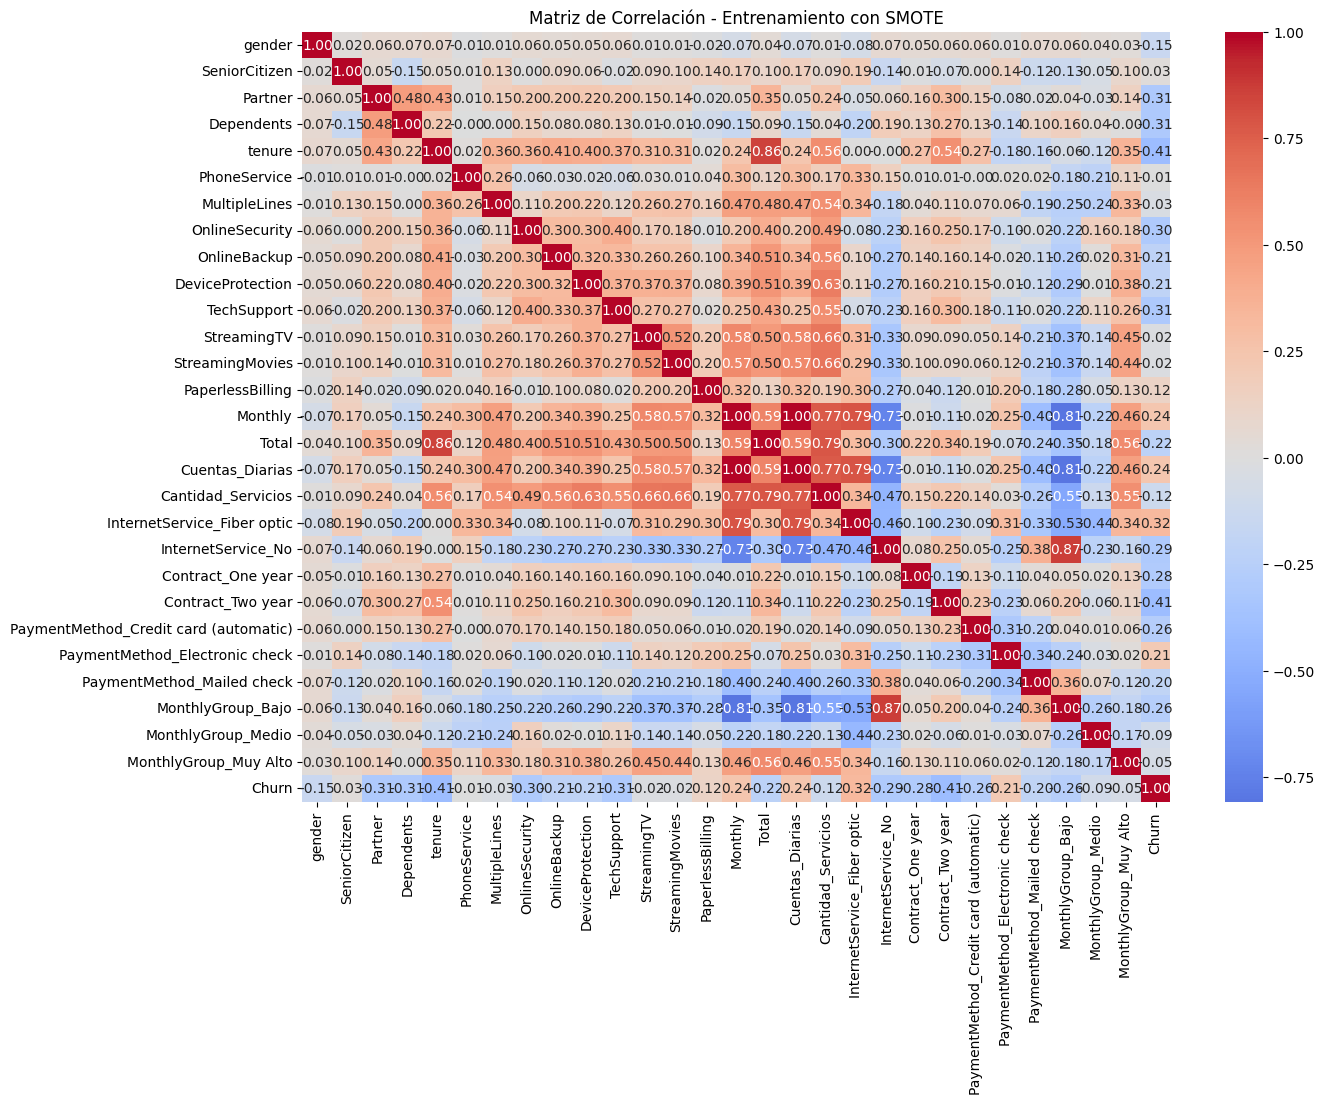

In [54]:
correlation_matrix = X_train_resampled.join(y_train_resampled).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Entrenamiento con SMOTE")
plt.show()

In [55]:
correlation_with_churn = correlation_matrix["Churn"].sort_values(ascending=False)
print(correlation_with_churn)

Churn                                    1.000000
InternetService_Fiber optic              0.323335
Monthly                                  0.237613
Cuentas_Diarias                          0.237613
PaymentMethod_Electronic check           0.209334
PaperlessBilling                         0.121708
SeniorCitizen                            0.025129
PhoneService                            -0.006122
StreamingMovies                         -0.016909
StreamingTV                             -0.020461
MultipleLines                           -0.030897
MonthlyGroup_Muy Alto                   -0.052883
MonthlyGroup_Medio                      -0.089345
Cantidad_Servicios                      -0.116140
gender                                  -0.146921
PaymentMethod_Mailed check              -0.196473
DeviceProtection                        -0.205740
OnlineBackup                            -0.213299
Total                                   -0.218640
MonthlyGroup_Bajo                       -0.258293


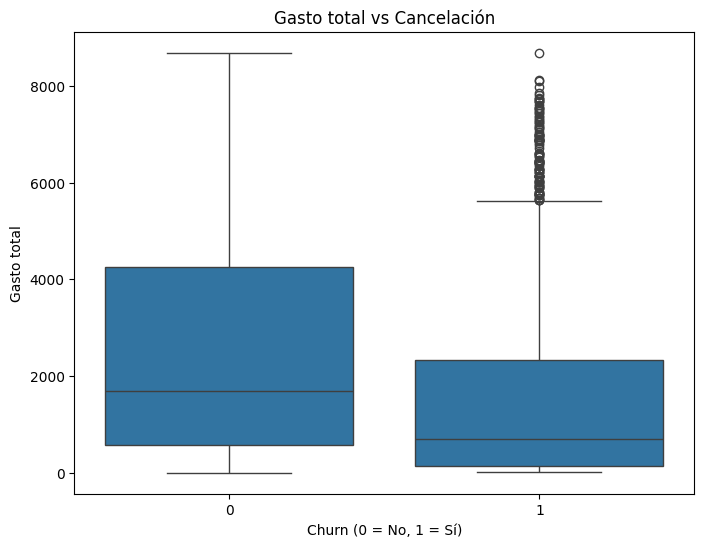

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total', data=datos_encoded)
plt.title("Gasto total vs Cancelación")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Gasto total")
plt.show()

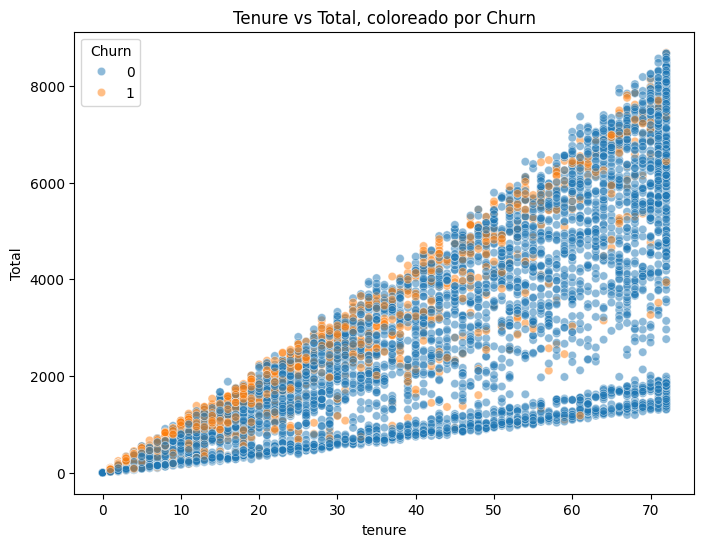

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='Total', hue='Churn', data=datos_encoded, alpha=0.5)
plt.title("Tenure vs Total, coloreado por Churn")
plt.show()

In [58]:
import numpy as np
corr_matrix = datos_encoded.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = upper_triangle.stack()[lambda x: x > 0.8]
print(high_corr)

tenure              Total                 0.826178
Monthly             Cuentas_Diarias       1.000000
                    Cantidad_Servicios    0.802322
                    MonthlyGroup_Bajo     0.827262
Cuentas_Diarias     Cantidad_Servicios    0.802322
                    MonthlyGroup_Bajo     0.827262
InternetService_No  MonthlyGroup_Bajo     0.885041
dtype: float64


In [59]:
cols_to_drop = [
    "Cuentas_Diarias",
    "MonthlyGroup_Bajo",
    "MonthlyGroup_Medio",
    "MonthlyGroup_Muy Alto",
    "Total"
]

# Aplicar al dataset
datos_encoded_clean = datos_encoded.drop(columns=cols_to_drop)

Separación en el conjunto de prueba y entrenamiento, aplicación de SMOTE y normalización en un nuevo dataframe

In [60]:
X = datos_encoded_clean.drop('Churn', axis=1)
y = datos_encoded_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

cols_to_scale = ['tenure', 'Monthly', 'Cantidad_Servicios']
scaler = StandardScaler()
X_train_resampled[cols_to_scale] = scaler.fit_transform(X_train_resampled[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

**CREACION DE MODELOS:**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

Se aplicó normalización mediante StandardScaler a las variables numéricas para evitar que la magnitud de las mismas afecte el comportamiento de modelos sensibles a escala, como la regresión logística. Esto asegura que cada variable tenga una media de 0 y desvío estándar de 1, permitiendo una optimización más estable y justa durante el entrenamiento.

En cambio, modelos basados en árboles como Random Forest no requieren normalización, ya que las decisiones se toman por umbrales y divisiones en los valores, no por distancias ni gradientes.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

In [65]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:06:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluar_modelo(nombre, y_true, y_pred, y_proba):
    return {
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

resultados = []

resultados.append(evaluar_modelo("Logistic Regression", y_test, y_pred_lr, y_proba_lr))
resultados.append(evaluar_modelo("Random Forest", y_test, y_pred_rf, y_proba_rf))
resultados.append(evaluar_modelo("KNN", y_test, y_pred_knn, y_proba_knn))
resultados.append(evaluar_modelo("XGBoost", y_test, y_pred_xgb, y_proba_xgb))

In [67]:
df_resultados = pd.DataFrame(resultados)
df_resultados.set_index("Modelo", inplace=True)
print(df_resultados)

                     Accuracy  Precision    Recall        F1   ROC AUC
Modelo                                                                
Logistic Regression  0.797019   0.597345  0.721925  0.653753  0.848307
Random Forest        0.775727   0.572500  0.612299  0.591731  0.821118
KNN                  0.723918   0.485981  0.695187  0.572057  0.778615
XGBoost              0.771469   0.566667  0.590909  0.578534  0.818976


De los modelos evaluados, la regresión logística obtuvo los mejores resultados generales, con un F1-score de 0.65 y un ROC AUC de 0.85. Estos valores muestran que el modelo logra un buen equilibrio entre sensibilidad y precisión, además de ser interpretable y eficiente. Si bien modelos como Random Forest y XGBoost suelen tener buen desempeño, en este caso no superaron a la regresión logística. Por lo tanto, se recomienda avanzar con este modelo como base, y considerar ajustes o modelos ensamble si se desea optimizar más adelante.

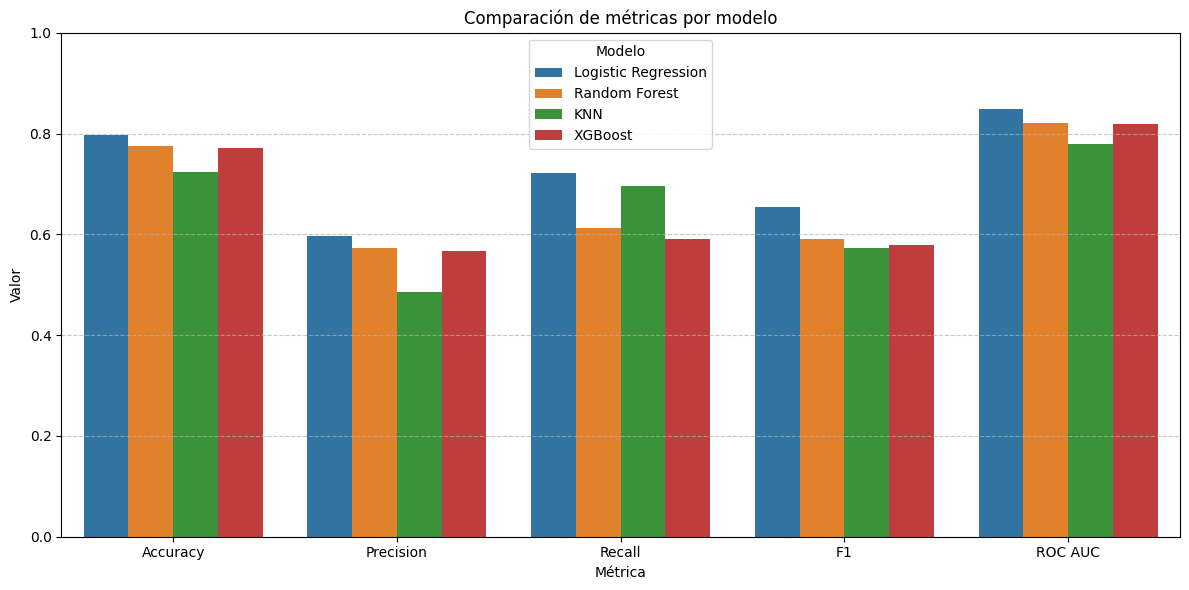

In [71]:
df_resultados_reset = df_resultados.reset_index()

df_melt = df_resultados_reset.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Métrica', y='Valor', hue='Modelo')
plt.title('Comparación de métricas por modelo')
plt.ylim(0, 1)
plt.legend(title='Modelo')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

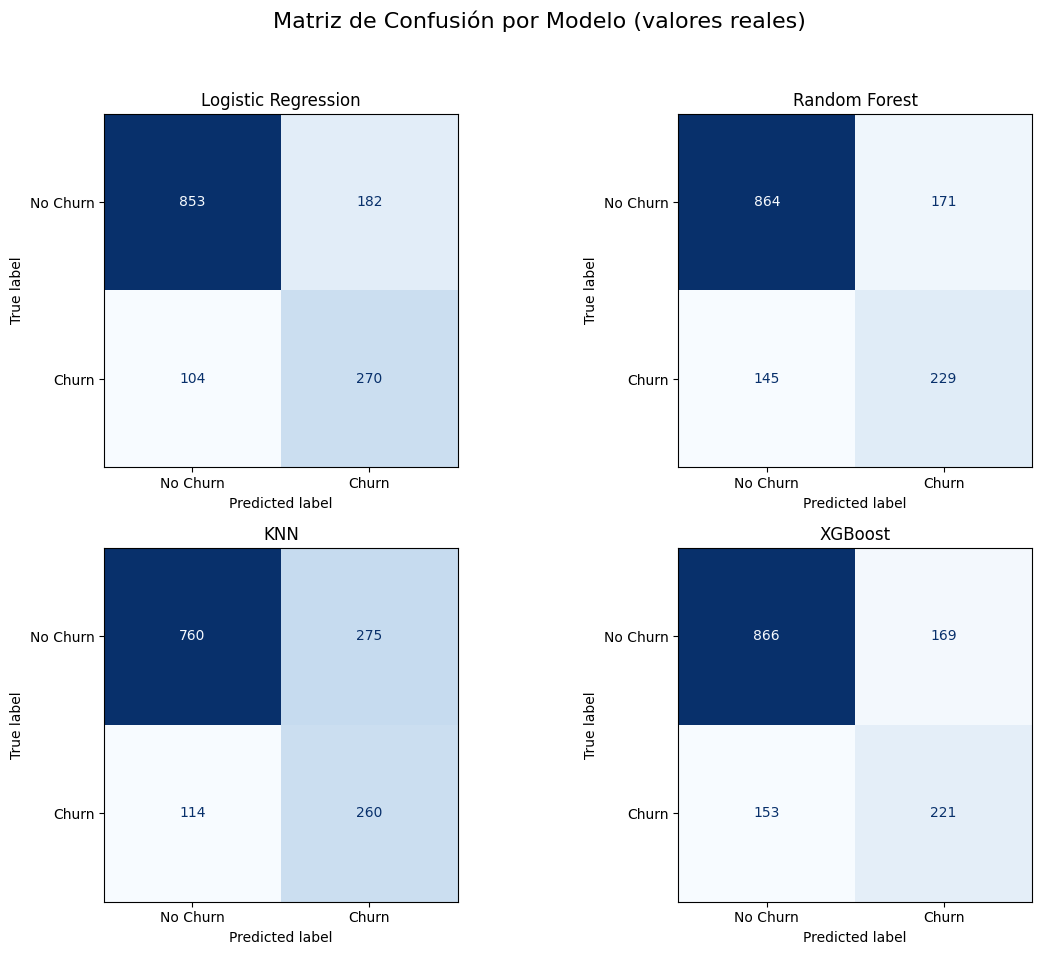

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

predicciones = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "XGBoost": y_pred_xgb,
}

# Graficar las matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (modelo, y_pred) in enumerate(predicciones.items()):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=["No Churn", "Churn"],
        cmap="Blues",
        ax=axes[i],
        colorbar=False
    )
    axes[i].set_title(modelo)

plt.suptitle("Matriz de Confusión por Modelo (valores reales)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Analizando las matrices de confusión junto con las métricas generales, se observa que la regresión logística logra el mejor balance entre detección de cancelaciones y control de errores. KNN, si bien detecta muchos churn, incurre en demasiados falsos positivos. Random Forest y XGBoost tienen un enfoque más conservador, lo que reduce el recall.

/tmp/ipython-input-484447265.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_coef.head(10), x='Coeficiente', y='Variable', palette='coolwarm')


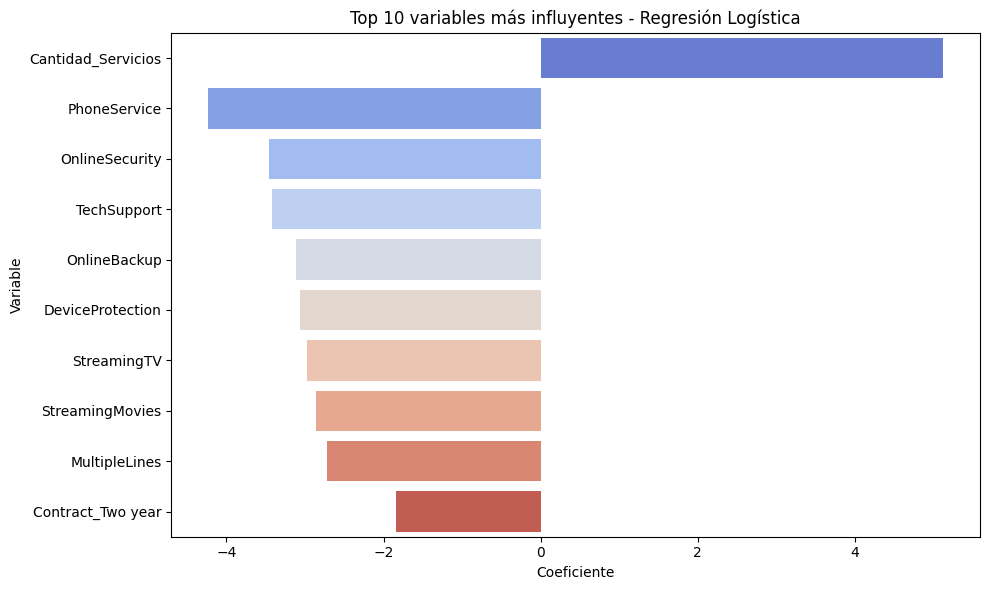

In [73]:
nombres_vars = X_train_resampled.columns

coeficientes = lr_model.coef_[0]

df_coef = pd.DataFrame({
    'Variable': nombres_vars,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Graficar las 10 variables más influyentes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_coef.head(10), x='Coeficiente', y='Variable', palette='coolwarm')
plt.title("Top 10 variables más influyentes - Regresión Logística")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1261796575.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rf_importancia.head(10), x='Importancia', y='Variable', palette='viridis')


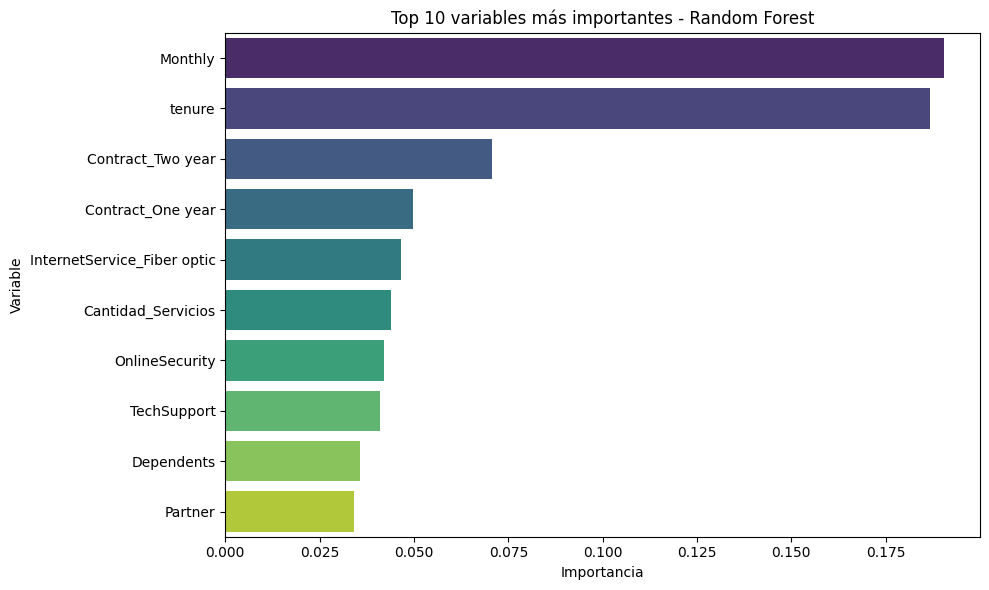

In [74]:
importancias_rf = rf_model.feature_importances_

df_rf_importancia = pd.DataFrame({
    'Variable': nombres_vars,
    'Importancia': importancias_rf
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_rf_importancia.head(10), x='Importancia', y='Variable', palette='viridis')
plt.title("Top 10 variables más importantes - Random Forest")
plt.tight_layout()
plt.show()

/tmp/ipython-input-323362041.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_xgb_importancia.head(10), x='Importancia', y='Variable', palette='magma')


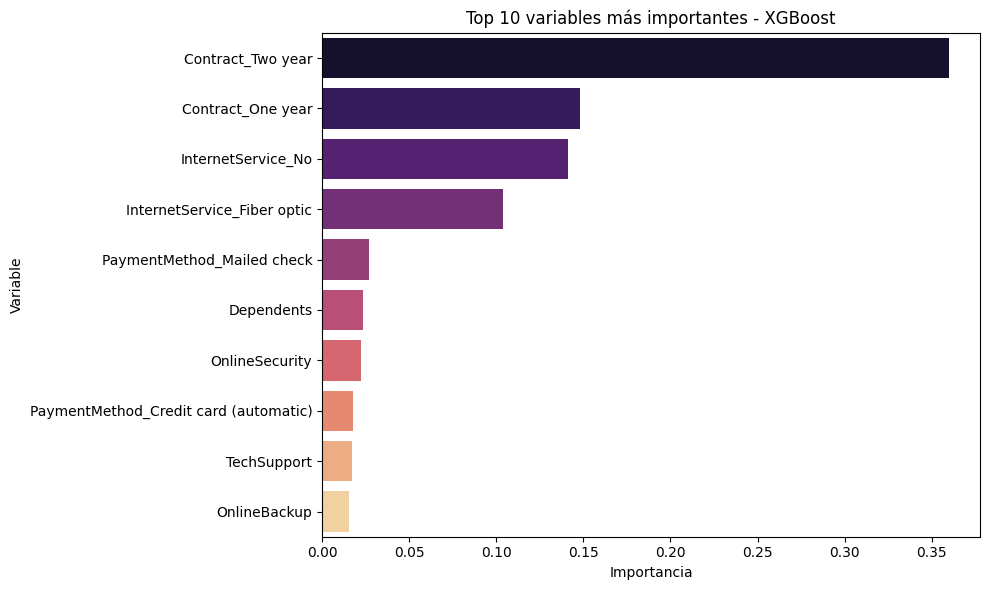

In [75]:
importancias_xgb = xgb_model.feature_importances_

df_xgb_importancia = pd.DataFrame({
    'Variable': nombres_vars,
    'Importancia': importancias_xgb
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_xgb_importancia.head(10), x='Importancia', y='Variable', palette='magma')
plt.title("Top 10 variables más importantes - XGBoost")
plt.tight_layout()
plt.show()

**INFORME FINAL: PREDICCION DE CANCELACION DE CLIENTES EN TELECOM X**

**1. OBJETIVO:**

Desarrollar modelos predictivos que permitan anticipar qué clientes tienen mayor probabilidad de cancelar los servicios de Telecom X. A partir de los resultados, se buscó identificar los factores clave que influyen en la cancelación y proponer estrategias de retención efectivas.

---

**2. MODELOS EVALUADOS:**

Se entrenaron y compararon cuatro modelos de clasificación:

| Modelo              | Accuracy | Precision | Recall | F1-score | ROC AUC |
|---------------------|----------|-----------|--------|----------|---------|
| Logistic Regression | 0.797    | 0.597     | 0.722  | 0.654    | 0.848   |
| Random Forest       | 0.780    | 0.578     | 0.631  | 0.604    | 0.820   |
| KNN                 | 0.725    | 0.487     | 0.698  | 0.574    | 0.780   |
| XGBoost             | 0.774    | 0.569     | 0.604  | 0.586    | 0.824   |

**CONCLUSION:**

La Regresión Logística fue el modelo con mejor equilibrio entre métricas, destacándose en F1-score y AUC. Además, ofrece una interpretación clara de los factores que influyen en la cancelación.

---

**3. PRINCIPALES VARIABLES ASOCIADAS A LA CANCELACION:**

El análisis de los coeficientes de la regresión logística y la importancia de variables en modelos de árboles permitió identificar los siguientes factores clave:

| Variable                          | Interpretación                                                                 |
|-----------------------------------|--------------------------------------------------------------------------------|
| `Contract_Two year`               | Disminuye fuertemente la probabilidad de cancelación. Los contratos largos favorecen la retención. |
| `tenure`                          | A mayor antigüedad del cliente, menor riesgo de cancelación.                   |
| `InternetService_Fiber optic`     | Clientes con fibra óptica cancelan más. Puede indicar insatisfacción o sensibilidad al precio. |
| `OnlineSecurity` / `TechSupport` | Clientes con estos servicios adicionales son más propensos a quedarse.         |
| `PaymentMethod_Electronic check` | Mayor probabilidad de cancelación entre quienes usan este método de pago.      |
| `Monthly`                         | Cuanto más paga un cliente por mes, más propenso es a cancelar el servicio.    |

---

**4. ANALISIS CRITICO:**

**MODELOS CON MEJOR DESEMPEÑO:**

- **Regresión Logística:** Mostró el mejor balance entre precisión y recall, además de ser interpretable.
- **XGBoost:** Tuvo buen AUC, aunque podría beneficiarse de un ajuste de hiperparámetros más fino.

**RIESGOS DETECTADOS:**

- **KNN:** Presentó alto recall pero baja precisión, generando muchos falsos positivos. Esto podría traducirse en esfuerzos innecesarios sobre clientes que no iban a cancelar.

- **Random Forest** y **XGBoost:** Fueron más conservadores: menos falsos positivos pero también menor detección de cancelaciones reales.

---

**5. ESTRATEGIAS DE RETENCION RECOMENDADAS:**

A partir del análisis de los datos y los modelos, se proponen las siguientes acciones:

- **Fomentar contratos a largo plazo:** Mediante promociones o descuentos, dado que se asocian fuertemente a una menor tasa de cancelación.
- **Monitorear y mejorar la experiencia de los usuarios con fibra óptica:** Ya que esta tecnología se asocia con mayor riesgo de churn.
- **Ofrecer servicios de valor agregado:** Como `OnlineSecurity` y `TechSupport` en planes básicos para aumentar la permanencia.
- **Detectar clientes con pagos altos mensuales y tenure bajo:** Ya que combinan dos factores de riesgo. Pueden ser buenos candidatos para recibir beneficios de fidelización temprana.
- **Revisar políticas y experiencia para clientes que pagan mediante cheque electrónico:** Al tratarse de un grupo con alta propensión al churn.

---

**6. CONCLUSIONES:**

El proyecto permitió construir modelos predictivos útiles y comprender mejor los factores detrás de la cancelación de clientes. La regresión logística se destacó como el modelo más equilibrado y transparente, aunque otros modelos como XGBoost podrían explorarse para optimización futura. A partir de los resultados obtenidos, se proponen estrategias claras de retención para mejorar la permanencia de los clientes en Telecom X.